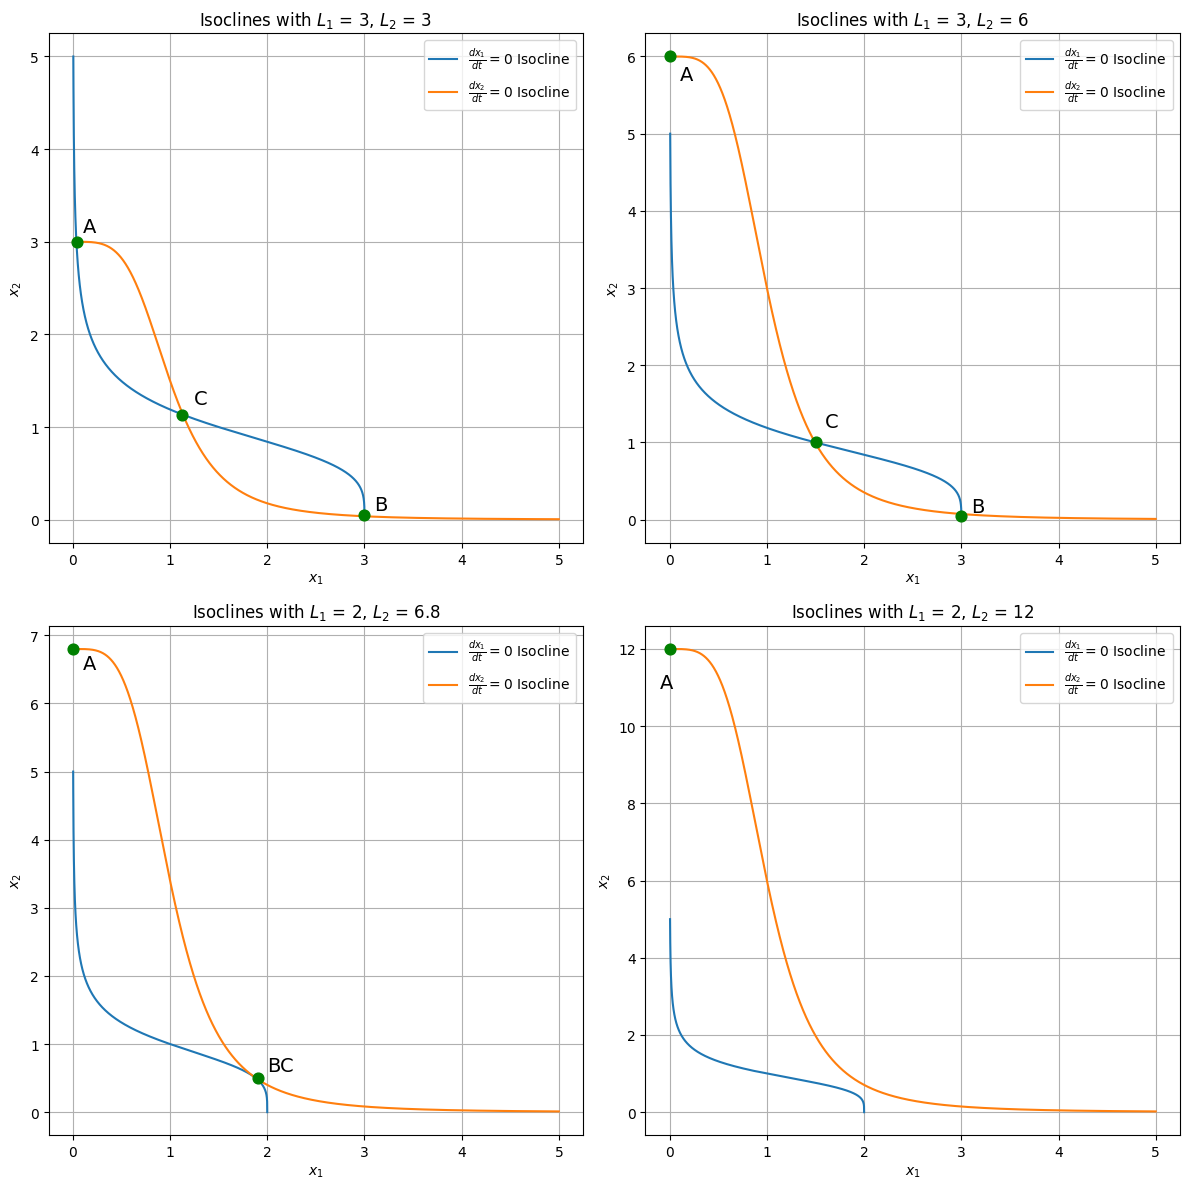

In [154]:
import numpy as np
import matplotlib.pyplot as plt

#####################################
L1 = 3
L2 = 3

L1_2 = 3
L2_2 = 6

L1_3 = 2
L2_3 = 6.8

L1_4 = 2
L2_4 = 12

m_1 = 1
m_2 = 4
##############################

x1_range = np.linspace(0, 5, 40000)
x2_range = np.linspace(0, 5, 40000)

x1_isocline_1 = L1 / (1 + x2_range ** m_2)
x2_isocline_1 = L2 / (1 + x1_range ** m_2)

x1_isocline_2 = L1_2 / (1 + x2_range ** m_2)
x2_isocline_2 = L2_2 / (1 + x1_range ** m_2)

x1_isocline_3 = L1_3 / (1 + x2_range ** m_2)
x2_isocline_3 = L2_3 / (1 + x1_range ** m_2)

x1_isocline_4 = L1_4 / (1 + x2_range ** m_2)
x2_isocline_4 = L2_4 / (1 + x1_range ** m_2)

plt.figure(figsize=(12, 12))

# Plotting with m = 1
plt.subplot(2, 2, 1)
plt.plot(x1_isocline_1, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline')
plt.plot(x1_range, x2_isocline_1, label=r'$\frac{dx_2}{dt} = 0$ Isocline')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with $L_1$ = 3, $L_2$ = 3')
plt.legend()
plt.grid(True)


### point A
plt.scatter(0.04, 3, color='green', s=60, zorder=5)
plt.text(0.1, 3.1, 'A', fontsize=14)

### point B
plt.scatter(3, 0.05,  color='green', s=60, zorder=5)
plt.text(3.1, 0.1,  'B', fontsize=14)

### point C
plt.scatter(1.125, 1.125,  color='green', s=60, zorder=5)
plt.text(1.25, 1.25, 'C', fontsize=14)

# Second plot with m = 3
plt.subplot(2, 2, 2)
plt.plot(x1_isocline_2, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline ')
plt.plot(x1_range, x2_isocline_2, label=r'$\frac{dx_2}{dt} = 0$ Isocline ')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with $L_1$ = 3, $L_2$ = 6')
plt.legend()
plt.grid()

### point A
plt.scatter(0, 6, color='green', s=60, zorder=5)
plt.text(0.1, 5.7, 'A', fontsize=14)

### point B
plt.scatter(3, 0.05,  color='green', s=60, zorder=5)
plt.text(3.1, 0.1,  'B', fontsize=14)

### point C
plt.scatter(1.5, 1,  color='green', s=60, zorder=5)
plt.text(1.6, 1.2, 'C', fontsize=14)


plt.subplot(2, 2, 3)
plt.plot(x1_isocline_3, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline ')
plt.plot(x1_range, x2_isocline_3, label=r'$\frac{dx_2}{dt} = 0$ Isocline ')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with $L_1$ = 2, $L_2$ = 6.8')
plt.legend()
plt.grid()

### point A
plt.scatter(0, 6.8, color='green', s=60, zorder=5)
plt.text(0.1, 6.5, 'A', fontsize=14)

### point BC
plt.scatter(1.9, 0.5,  color='green', s=60, zorder=5)
plt.text(2, 0.6, 'BC', fontsize=14)


plt.subplot(2, 2, 4)
plt.plot(x1_isocline_4, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline ')
plt.plot(x1_range, x2_isocline_4, label=r'$\frac{dx_2}{dt} = 0$ Isocline ')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with $L_1$ = 2, $L_2$ = 12')
plt.legend()
plt.grid()


### point A
plt.scatter(0, 12, color='green', s=60, zorder=5)
plt.text(-0.1, 11, 'A', fontsize=14)


plt.tight_layout()
plt.savefig('images/diff-L_isoclines.png')
plt.show()


<Figure size 800x600 with 0 Axes>

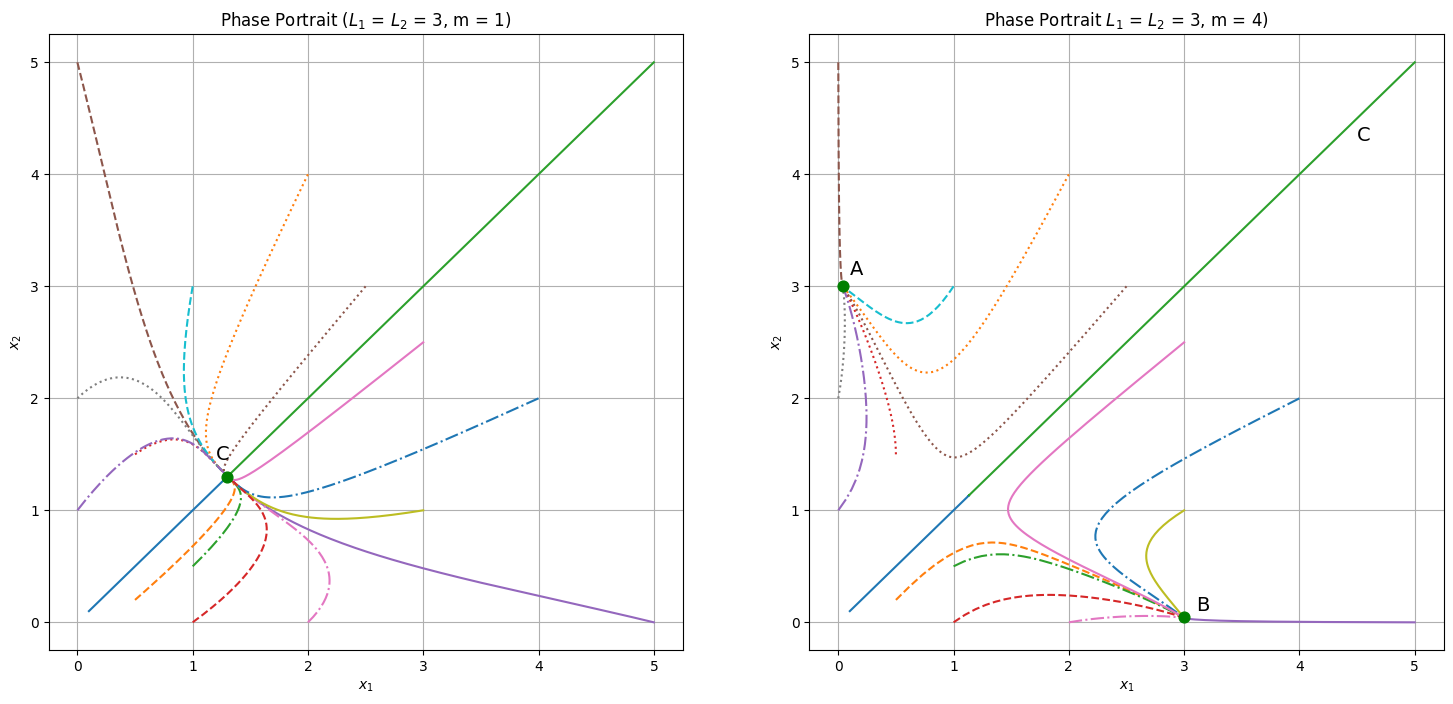

In [121]:
from scipy.integrate import odeint

m_3 = 1
m_4 = 4

L_phase = 3

def func_1(X, t):
    x1, x2 = X

    dx1_dt = (L_phase / (1 + x2 ** m_3)) - x1
    dx2_dt = (L_phase / (1 + x1 ** m_3)) - x2

    return [dx1_dt, dx2_dt]

def func_2(X, t):
    x1, x2 = X

    dx1_dt = (L_phase / (1 + x2 ** m_4)) - x1
    dx2_dt = (L_phase / (1 + x1 ** m_4)) - x2

    return [dx1_dt, dx2_dt]

t = np.linspace(0, 20, 400)

plt.figure(figsize=(8, 6))

initial_conditions = [
    [0.1, 0.1], [0.5, 0.2], [1, 0.5],
    [0.5, 1.5], [5, 0], [0, 5], [2, 0],
    [0, 2], [3, 1], [1, 3], [4, 2], [2, 4],
    [5, 5], [1, 0], [0, 1], [2.5, 3], [3, 2.5]
]

line_styles = ['-', '--', '-.', ':']

# Plotting the phase portrait
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
for i, X0 in enumerate(initial_conditions):
    X = odeint(func_1, X0, t)
    plt.plot(X[:, 0], X[:, 1], linestyle=line_styles[i % len(line_styles)])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait ($L_1$ = $L_2$ = 3, m = 1)')
plt.grid()

### point C
plt.scatter(1.3, 1.3, color='green', s=60, zorder=5)
plt.text(1.2, 1.45, 'C', fontsize=14)


#################### 3


plt.subplot(1, 2, 2)
for i, X0 in enumerate(initial_conditions):
    X = odeint(func_2, X0, t)
    plt.plot(X[:, 0], X[:, 1], linestyle=line_styles[i % len(line_styles)])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait $L_1$ = $L_2$ = 3, m = 4)')
plt.grid()

### point A
plt.scatter(0.04, 3, color='green', s=60, zorder=5)
plt.text(0.1, 3.1, 'A', fontsize=14)

### point B
plt.scatter(3, 0.05,  color='green', s=60, zorder=5)
plt.text(3.1, 0.1,  'B', fontsize=14)

### point C
plt.text(4.5, 4.3, 'C', fontsize=14)

plt.savefig('images/m1-m4_L3_phase.png')
plt.show()
